In [1]:
import matplotlib.pyplot as plt 
from matplotlib import cm 
import pickle 
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

plt.style.use('seaborn-whitegrid')
f = pd.read_csv('results5.csv')
f2 = pd.read_csv('results5_2.csv')
f3 = pd.read_csv('results5_3.csv')
f4 = pd.read_csv('results5_4.csv')
%matplotlib inline

In [11]:
temp_f = f.drop_duplicates(subset='n_ap', keep='last')
new_f = temp_f.sort_values(by = 'n_ap')
temp_f2 = f2.drop_duplicates(subset='n_ap', keep='last')
new_f2 = temp_f2.sort_values(by = 'n_ap')
temp_f3 = f3.drop_duplicates(subset='n_ap', keep='last')
new_f3 = temp_f3.sort_values(by = 'n_ap')
temp_f4 = f4.drop_duplicates(subset='n_ap', keep='last')
new_f4 = temp_f4.sort_values(by = 'n_ap')

In [12]:
new_f4

,n_ap,ratio,C,n_pre_ap
102,4.0,0.923770,0.01,1
52,5.0,0.938782,0.01,2
98,6.0,0.922313,0.01,2
45,7.0,0.926733,0.01,3
38,8.0,0.910310,0.01,3
24,9.0,0.907524,0.01,4
20,10.0,0.913488,0.01,5
17,11.0,0.889499,0.01,5
15,12.0,0.896068,0.01,6
12,13.0,0.867788,0.01,6


## Fitting with sigmoidal function

In [13]:
def sigmoid(x, L ,x0, k, b):
    y = -L / (1 + np.exp(-k*(x-x0)))+b
    return y

p0 = [max(new_f["ratio"]), np.median(new_f["n_ap"]), 1, min(new_f["ratio"])] # this is an mandatory initial guess
p02 = [max(new_f2["ratio"]), np.median(new_f2["n_ap"]), 1, min(new_f2["ratio"])] # this is an mandatory initial guess
p03 = [max(new_f3["ratio"]), np.median(new_f3["n_ap"]), 1, min(new_f3["ratio"])] # this is an mandatory initial guess
p04 = [max(new_f4["ratio"]), np.median(new_f4["n_ap"]), 1, min(new_f4["ratio"])]

popt, pcov = curve_fit(sigmoid, new_f["n_ap"], new_f["ratio"], p0, method='dogbox')
popt2, pcov2 = curve_fit(sigmoid, new_f2["n_ap"], new_f2["ratio"], p02, method='dogbox')
popt3, pcov3 = curve_fit(sigmoid, new_f3["n_ap"], new_f3["ratio"], p03, method='dogbox')
popt4, pcov4 = curve_fit(sigmoid, new_f4["n_ap"], new_f4["ratio"], p04, method='dogbox')

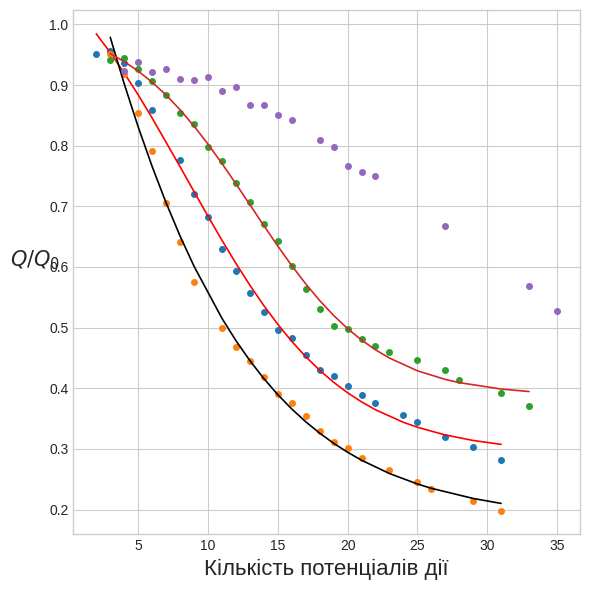

In [14]:
fig, axs = plt.subplots(dpi=100, figsize=(6, 6), )

plt.plot(new_f["n_ap"], new_f["ratio"], "o", markersize=4)
plt.plot(new_f["n_ap"], sigmoid( new_f["n_ap"], *popt), 'r-', lw=1.2)

plt.plot(new_f2["n_ap"], new_f2["ratio"], "o", markersize=4)
plt.plot(new_f2["n_ap"], sigmoid( new_f2["n_ap"], *popt2), 'k-', lw=1.2)

plt.plot(new_f3["n_ap"], new_f3["ratio"], "o", markersize=4)
plt.plot(new_f3["n_ap"], sigmoid( new_f3["n_ap"], *popt3), '-', lw=1.2)

plt.plot(new_f4["n_ap"], new_f4["ratio"], "o", markersize=4, label="C=0.01")
#plt.plot(new_f4["n_ap"], sigmoid( new_f4["n_ap"], *popt3), '-', lw=1.2, label="фітування для С=0.01")

plt.xlabel("Кількість потенціалів дії", fontsize=16)
plt.ylabel("$Q/Q_0$", fontsize=15, labelpad=10).set_rotation(0)
plt.tight_layout()
#plt.savefig('../../Diplom/images/n_ap_charge.png')
plt.show()